# Symptom Extraction and Linking from Vaccine Adverse Event Reports <br> CS 584 - A

### Student information:
**Full name:** Thanapoom Phatthanaphan<br>
**CWID:** 20011296<br>

### Background and the Goal
Sequence labeling has been one of the most well-known topics in linguistics and computational linguistics history. Some examples of sequence labeling include part of speech (POS) tagging, named entity recognition (NER), and event detection (ED). In this project, I will apply sequence labeling techniques to a healthcare data, namely VAERS data, from Vaccine Adverse Events Reporting Systems (VAERS). The goal of the project is to automatically identify symptoms after vaccination (i.e., vaccine adverse events) from VAERS reports.

**Goal**
1. Use existing or develop new named entity recognition packages to identify symptom-related terms from narrative text reports.
2. Develop named entity linking methods to link the identified terms to standard terms in a dictionary.

### Dataset
The Vaccine Adverse Event Reporting System (VAERS) is a national early warning system to detect possible safety problems in U.S.-licensed vaccines. VAERS is co-managed by the Centers for Disease Control and Prevention (CDC) and the U.S. Food and Drug Administration (FDA). VAERS accepts and analyzes reports of adverse events (possible side effects) after a person has received a vaccination.
There are three tables in the VAERS dataset that will be used in this project, including VAERS Data, VAERS Symptoms, and VAERS Vaccine.

- **VAERS Data:** The dataset contains detailed information about individual VAER submitted to the VAERS system.
- **VAERS Symptoms:** The dataset contains a list of symptoms and their corresponding codes that are reported in adverse event narratives.
- **VAERS Vaccine:** The dataset provides information about the vaccines including their charac-teristics and administration.

The datasets spanning from 2010 to the present day will serve as the foundation for creating new named entity recognition packages to identify terms related to symptoms and developing named entity linking methods to connect these identified terms to standardized terms present in a dictionary.

### Experiments
The evaluation of the machine learning model's performance is a critical aspect of this project. However, it's essential to note that there is no ground truth annotation available for the data, making evaluation challenging. To overcome this limitation, a combination of automatic and manual evaluations will be employed.

- **Automatic Evaluation:** The model's accuracy in correctly classifying symptoms will be assessed through automatic evaluation metrics.
- **Manual Evaluation:** To ensure the accuracy of the model's predictions, a sample of clinical notes (typically 20~50) will be selected for manual evaluation. Experts manually review the results, verifying the correctness of the model's predictions.

The three key metrics, including precision, recall, and F1-score, will serve as essential tools for assessing the model’s performance in identifying and linking symptoms.

- **Precision:** Precision will measure the accuracy of identified symptoms, ensuring their trustworthiness and relevance
- **Recall:** Recall will determine the model's ability to capture all relevant symptoms, minimizing the risk of missing significant health indicators
- **F1-score:** F1-score will provide an overall evaluation of the model’s effectiveness in both accuracy and completeness.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

## 2. Data preprocessing

### Importing and Combining the datasets
Import three datasets, including VAERS Data, VAERS Symptoms, and VAERS Vaccine. Since each year of data is separated into its individual file, thus I will combine them into one file that contains data from 2010 to the present.

In [3]:
# Import datasets
# Combine separated datasets each year into one dataset
# VAERS Data
vaers_data_path = '/content/drive/My Drive/Colab Notebooks/Vaers_data/*.csv'
vaers_data_files = glob.glob(vaers_data_path)

vaers_data = pd.DataFrame()

for file in vaers_data_files:
    try:
        data = pd.read_csv(file)
    except UnicodeDecodeError:
        data = pd.read_csv(file, encoding='latin1')
    vaers_data = pd.concat([vaers_data, data], ignore_index=True)

# VAERS Symptoms
vaers_symp_path = '/content/drive/My Drive/Colab Notebooks/Vaers_symptoms/*.csv'
vaers_symp_files = glob.glob(vaers_symp_path)

vaers_symp = pd.DataFrame()

for file in vaers_symp_files:
    try:
        data = pd.read_csv(file)
    except UnicodeDecodeError:
        data = pd.read_csv(file, encoding='latin1')
    vaers_symp = pd.concat([vaers_symp, data], ignore_index=True)

# VAERS Vaccine
vaers_vax_path = '/content/drive/My Drive/Colab Notebooks/Vaers_vax/*.csv'
vaers_vax_files = glob.glob(vaers_vax_path)

vaers_vax = pd.DataFrame()

for file in vaers_vax_files:
    try:
        data = pd.read_csv(file)
    except UnicodeDecodeError:
        data = pd.read_csv(file, encoding='latin1')
    vaers_vax = pd.concat([vaers_vax, data], ignore_index=True)

<ipython-input-3-682894d3668c>:13: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, encoding='latin1')
<ipython-input-3-682894d3668c>:13: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, encoding='latin1')
<ipython-input-3-682894d3668c>:13: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, encoding='latin1')
<ipython-input-3-682894d3668c>:13: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, encoding='latin1')
<ipython-input-3-682894d3668c>:13: DtypeWarning: Columns (7,9,10,12,15,16,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, encoding='latin1')
<ipython-input-3-682894d3668c>:13: DtypeWarning: Columns (7,12,15,23) h

In [4]:
# Check VAERS Data after combined
vaers_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,375646,01/01/2010,FL,28.0,28.0,NaN,F,01/01/2010,"AT A FAMILY GET-TOGETHER, I WAS LAUGHING AND I...",NaN,...,NONE.,"ASTHMA, LUPUS, HYPOTHYROIDISM.",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,375647,01/01/2010,IL,75.0,75.0,NaN,M,01/01/2010,Red rash developed on lower part of left arm f...,NaN,...,taking Voltaren for pain in right arm - starte...,sulfa allergies,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
2,375648,01/01/2010,MN,30.0,30.0,NaN,F,01/01/2010,Nausea and vomiting for about 12 hours. I was...,NaN,...,No,allergy to penicillin,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,375650,01/01/2010,ID,35.0,35.0,NaN,M,01/01/2010,"Diarrhea, Fatigue, Muscle Aches, nausea, stoma...",NaN,...,No,No,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
4,375651,01/01/2010,WA,65.0,65.0,NaN,F,01/01/2010,"Between 4:30 PM and 5:15PM, I consumed several...",NaN,...,None,none,Temporary Paralysis~Tetanus Toxoid (no brand n...,NaN,1,NaN,NaN,NaN,NaN,NaN


In [5]:
vaers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504868 entries, 0 to 1504867
Data columns (total 35 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1504868 non-null  int64  
 1   RECVDATE      1504868 non-null  object 
 2   STATE         1246120 non-null  object 
 3   AGE_YRS       1277028 non-null  float64
 4   CAGE_YR       1154313 non-null  float64
 5   CAGE_MO       52941 non-null    float64
 6   SEX           1504868 non-null  object 
 7   RPT_DATE      260228 non-null   object 
 8   SYMPTOM_TEXT  1503931 non-null  object 
 9   DIED          20508 non-null    object 
 10  DATEDIED      17770 non-null    object 
 11  L_THREAT      19893 non-null    object 
 12  ER_VISIT      68265 non-null    object 
 13  HOSPITAL      106905 non-null   object 
 14  HOSPDAYS      64474 non-null    float64
 15  X_STAY        1706 non-null     object 
 16  DISABLE       25479 non-null    object 
 17  RECOVD        1347421 non-n

In [6]:
# Check VAERS Symptoms after combined
vaers_symp.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,375646,Chest X-ray normal,12.1,Chest discomfort,12.1,Cough,12.1,Dyspnoea,12.1,Wheezing,12.1
1,375647,Erythema,12.1,Rash,12.1,Rash macular,12.1,NaN,NaN,NaN,NaN
2,375648,Nausea,12.1,Vomiting,12.1,NaN,NaN,NaN,NaN,NaN,NaN
3,375650,Abdominal pain upper,12.1,Diarrhoea,12.1,Fatigue,12.1,Headache,12.1,Myalgia,12.1
4,375650,Nausea,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
vaers_symp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947800 entries, 0 to 1947799
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VAERS_ID         int64  
 1   SYMPTOM1         object 
 2   SYMPTOMVERSION1  float64
 3   SYMPTOM2         object 
 4   SYMPTOMVERSION2  float64
 5   SYMPTOM3         object 
 6   SYMPTOMVERSION3  float64
 7   SYMPTOM4         object 
 8   SYMPTOMVERSION4  float64
 9   SYMPTOM5         object 
 10  SYMPTOMVERSION5  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 163.5+ MB


In [8]:
# Check VAERS Vaccine after combined
vaers_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,375646,FLU(H1N1),SANOFI PASTEUR,NaN,1,IM,LA,INFLUENZA (H1N1) (H1N1 (MONOVALENT) (SANOFI))
1,375647,FLU(H1N1),SANOFI PASTEUR,UP078AA,1,IM,LA,INFLUENZA (H1N1) (H1N1 (MONOVALENT) (SANOFI))
2,375648,FLUX(H1N1),UNKNOWN MANUFACTURER,NaN,1,NaN,NaN,INFLUENZA (H1N1) (H1N1 (MONOVALENT) (UNKNOWN))
3,375650,FLUX(H1N1),UNKNOWN MANUFACTURER,NaN,1,IM,LA,INFLUENZA (H1N1) (H1N1 (MONOVALENT) (UNKNOWN))
4,375651,VARZOS,UNKNOWN MANUFACTURER,NaN,1,NaN,RA,ZOSTER (NO BRAND NAME)


In [9]:
vaers_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754353 entries, 0 to 1754352
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   VAERS_ID         int64 
 1   VAX_TYPE         object
 2   VAX_MANU         object
 3   VAX_LOT          object
 4   VAX_DOSE_SERIES  object
 5   VAX_ROUTE        object
 6   VAX_SITE         object
 7   VAX_NAME         object
dtypes: int64(1), object(7)
memory usage: 107.1+ MB


### Selecting significant samples
Since the VAERS Data has more than 1 million records, I will select a small sample based on one vaccine type.

In [10]:
# Get the number of data based on VAX_TYPE for proper selection of datasets
vaers_vax['VAX_TYPE'].value_counts().head()

COVID19    1009575
VARZOS      108667
FLU3         57602
FLU4         43724
PPV          42530
Name: VAX_TYPE, dtype: int64

From the above number, I will select samples for developing a system to identify symptoms based on 'COVID19' vaccine type because the number of data is sufficient.

In [11]:
# Based on the VAERS_ID, get 10,000 reports related to the COVID19 vaccine from the VAERS Data table
# Firstly, get 10,000 reports related to the COVID19 vaccine from VAERS Vaccine table
covid_vaers_id = []
for i in range(len(vaers_vax)):
    if vaers_vax['VAX_TYPE'][i] != 'COVID19':
        continue
    else:
        if vaers_vax['VAERS_ID'][i] not in covid_vaers_id:
            covid_vaers_id.append(vaers_vax['VAERS_ID'][i])
            if len(covid_vaers_id) >= 10000:
                break

# Check that the list contains 10,000 VAER_ID
len(covid_vaers_id)

10000

In [12]:
# Secondly, get 10,000 reports from the column SYMPTOM_TEXT in the VAERS Data table
covid_reports = pd.DataFrame({'VAERS_ID': [], 'SYMPTOM_TEXT': []})
for vaers_id in covid_vaers_id:

    new_row = {'VAERS_ID': vaers_id,
               'SYMPTOM_TEXT': vaers_data[vaers_data['VAERS_ID'] == vaers_id]['SYMPTOM_TEXT'].values}
    covid_reports = pd.concat([covid_reports, pd.DataFrame(new_row)], ignore_index=True)

# Convert 'VAERS_ID' to integers
covid_reports['VAERS_ID'] = covid_reports['VAERS_ID'].astype(int)

# Check the context in the corpus
covid_reports

,VAERS_ID,SYMPTOM_TEXT
0,2669769,"body aches, fatigue Narrative: Took OTC Tyleno..."
1,2527460,"Headache, Myalgia, NauseaVomiting, chills Narr..."
2,2673135,"Headache, Fever, Body aches Narrative: Other ..."
3,2672717,Headache & Myalgia Narrative: Other Relevant...
4,902418,Patient experienced mild numbness traveling fr...
...,...,...
9995,916173,REDNESS TO INJECTION SITE 12-30-20. PROGRESSED...
9996,916174,Patient described joint and muscle pain in the...
9997,916176,"Numbness and tingling on left side of face, ey..."
9998,916177,"HIVES, tachypnea, vomiting - normal saline, ne..."


The distribution of the length of different reports

In [13]:
# The distribution of the length of different reports
vaers_data['REPORT_LENGTH'] = vaers_data['SYMPTOM_TEXT'].str.len()
report_length_stats = vaers_data['REPORT_LENGTH'].describe()
report_length_stats

count    1.503931e+06
mean     6.496922e+02
std      8.788270e+02
min      1.000000e+00
25%      1.080000e+02
50%      3.130000e+02
75%      9.310000e+02
max      3.199200e+04
Name: REPORT_LENGTH, dtype: float64

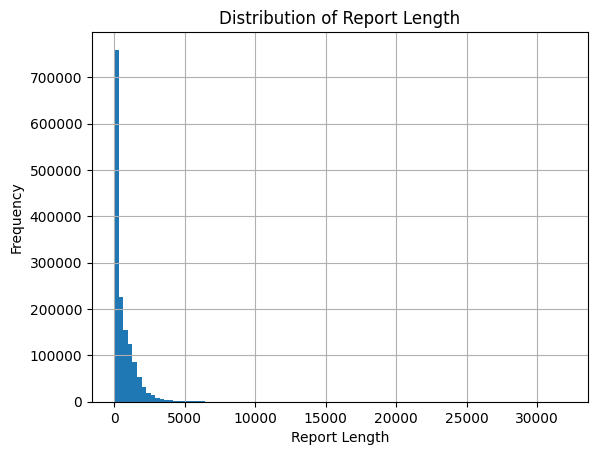

In [14]:
# Plot the graph to see the distribution of the length of different reports
vaers_data['REPORT_LENGTH'].hist(bins=100)
plt.xlabel('Report Length')
plt.ylabel('Frequency')
plt.title('Distribution of Report Length')
plt.show()

The distribution of the length of different reports (10,000 Covid-19 reports)

In [15]:
# The distribution of the length of different reports (10,000 Covid-19 reports)
covid_reports['REPORT_LENGTH'] = covid_reports['SYMPTOM_TEXT'].str.len()
covid_report_length_stats = covid_reports['REPORT_LENGTH'].describe()
covid_report_length_stats

count    10000.000000
mean       375.680100
std        494.695037
min          2.000000
25%         81.000000
50%        198.000000
75%        466.000000
max       5904.000000
Name: REPORT_LENGTH, dtype: float64

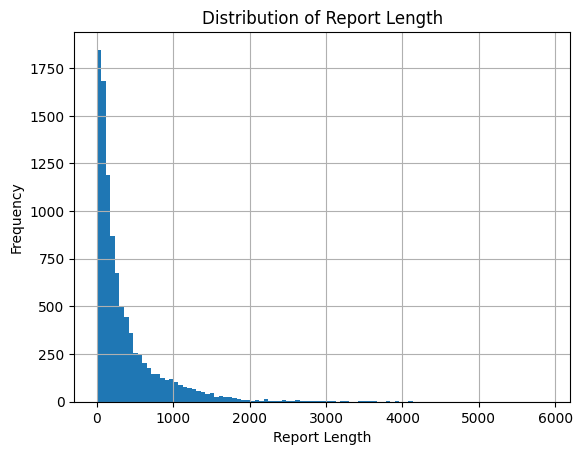

In [16]:
# Plot the graph to see the distribution of the length of different reports (10,000 Covid-19 reports)
covid_reports['REPORT_LENGTH'].hist(bins=100)
plt.xlabel('Report Length')
plt.ylabel('Frequency')
plt.title('Distribution of Report Length')
plt.show()

### Standard symptoms
Build the corresponding standard symptom list with the symptoms in VAERS Symptoms table, and find the most frequent 100 symptoms.

In [17]:
# Build the standard symptom list
std_symp_dict = {}
for vaers_id in covid_reports['VAERS_ID']:
    for col_symp in ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']:
        symptom = vaers_symp.loc[vaers_symp['VAERS_ID'] == vaers_id][col_symp].values[0]
        if pd.notna(symptom):
            std_symp_dict[symptom] = std_symp_dict.get(symptom, 0) + 1

# Get the list of standard symptoms
std_symp = list(std_symp_dict.keys())
std_symp

['Fatigue',
 'Pain',
 'Chills',
 'Headache',
 'Myalgia',
 'Nausea',
 'Vomiting',
 'Pyrexia',
 'Hypoaesthesia',
 'Injection site hypoaesthesia',
 'Erythema',
 'Feeling hot',
 'Flushing',
 'Dizziness',
 'Electrocardiogram normal',
 'Hyperhidrosis',
 'Laboratory test normal',
 'Presyncope',
 'Dysgeusia',
 'Oral pruritus',
 'Paraesthesia',
 'Paraesthesia oral',
 'Parosmia',
 'Chest discomfort',
 'Defaecation urgency',
 'Diarrhoea',
 'Chest pain',
 'Feeling abnormal',
 'Intensive care',
 'Blood pressure increased',
 'Dyspnoea',
 'Visual impairment',
 'Ear discomfort',
 'Palpitations',
 'Throat tightness',
 'Inappropriate schedule of product administration',
 'Eye pruritus',
 'Asthenia',
 'Heart rate increased',
 'Hypertension',
 'Blood glucose normal',
 'Blood test',
 'Injection site pain',
 'Pain in extremity',
 'Malaise',
 'Lip swelling',
 'Swelling face',
 'Feeling of body temperature change',
 'Rash',
 'Oropharyngeal pain',
 'Cold sweat',
 'Condition aggravated',
 'Panic attack',
 'Abdo

In [18]:
# Sort the dictionary by values (frequencies) in descending order
sorted_symp_freq = sorted(std_symp_dict.items(), key=lambda item: item[1], reverse=True)

# Get the top 100 symptoms with the highest frequencies
top_symp = [symp for symp, freq in sorted_symp_freq[:100]]

# Get the list of the top 100 symptoms
top_symp

['Headache',
 'Fatigue',
 'Chills',
 'Dizziness',
 'Pain',
 'Nausea',
 'Injection site pain',
 'Pyrexia',
 'Pain in extremity',
 'Arthralgia',
 'Myalgia',
 'Pruritus',
 'Paraesthesia',
 'Dyspnoea',
 'Flushing',
 'Rash',
 'Hypoaesthesia',
 'Cough',
 'Diarrhoea',
 'Injection site erythema',
 'Urticaria',
 'Erythema',
 'Chest discomfort',
 'Feeling hot',
 'Asthenia',
 'Hyperhidrosis',
 'Heart rate increased',
 'Palpitations',
 'Malaise',
 'Paraesthesia oral',
 'Feeling abnormal',
 'Injection site swelling',
 'Blood pressure increased',
 'Vomiting',
 'Tachycardia',
 'Lymphadenopathy',
 'Throat irritation',
 'Hypoaesthesia oral',
 'Anxiety',
 'Body temperature increased',
 'Dysgeusia',
 'Oropharyngeal pain',
 'Chest pain',
 'Back pain',
 'Throat tightness',
 'Injection site pruritus',
 'Immediate post-injection reaction',
 'Condition aggravated',
 'Injection site warmth',
 'Unevaluable event',
 'Dysphagia',
 'Lip swelling',
 'Hot flush',
 'Hypertension',
 'Electrocardiogram',
 'SARS-CoV-2 t

The distribution of the number of different symptoms

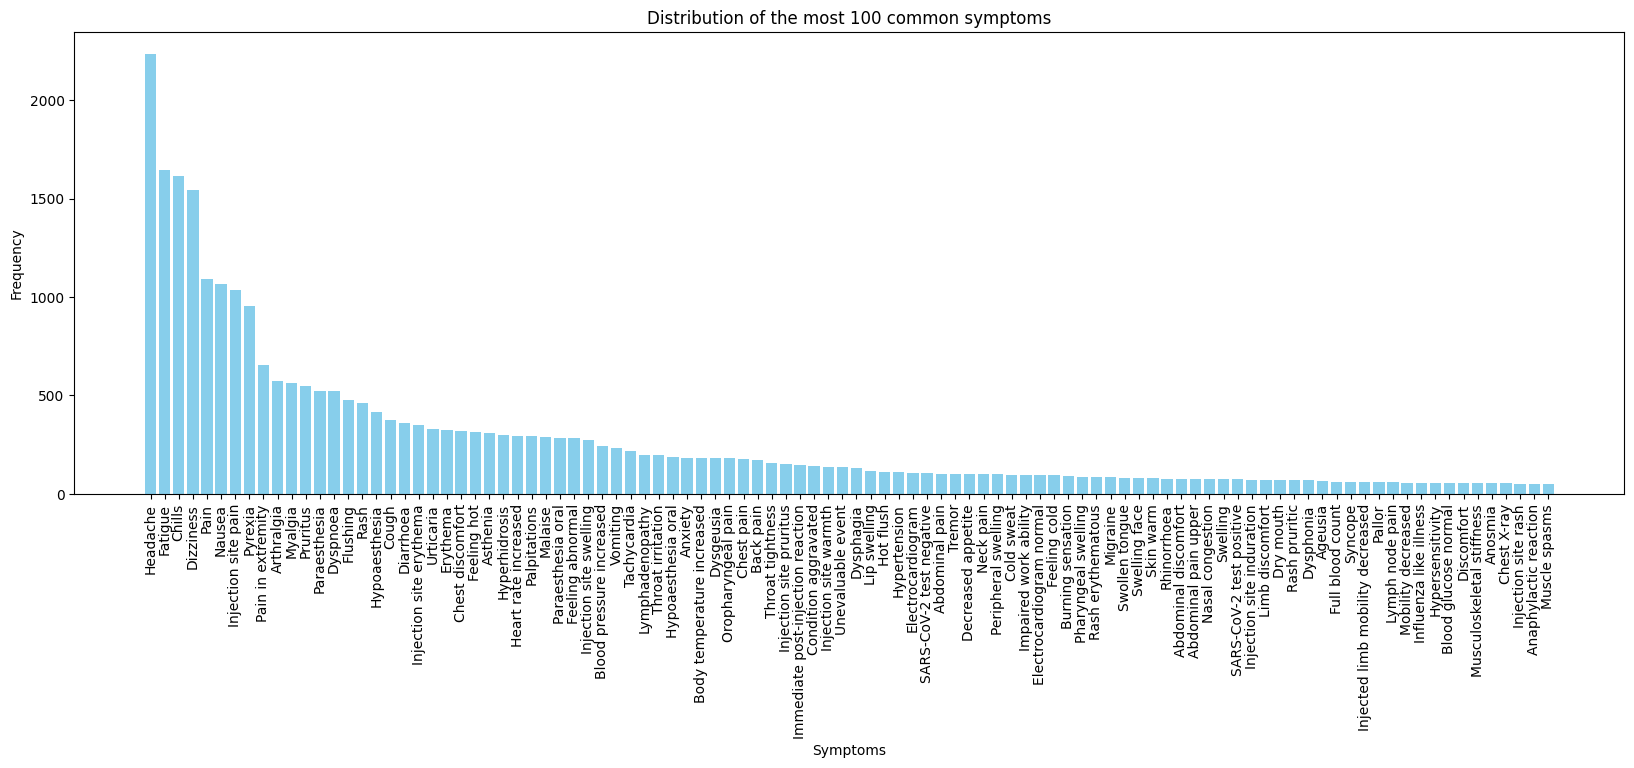

In [19]:
# Extract the symptoms and their corresponding frequencies
symptoms = list(std_symp_dict.keys())
frequencies = list(std_symp_dict.values())

# Sort symptoms and frequencies by frequency in descending order
sorted_indices = sorted(range(len(frequencies)), key=lambda k: frequencies[k], reverse=True)
symptoms = [symptoms[i] for i in sorted_indices]
frequencies = [frequencies[i] for i in sorted_indices]

# Take only the top 100 symptoms
top_symptoms = symptoms[:100]
top_frequencies = frequencies[:100]

# Create a bar plot to visualize the distribution
plt.figure(figsize=(20, 6))  # Set the figure size
plt.bar(top_symptoms, top_frequencies, color='skyblue')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.title('Distribution of the most 100 common symptoms')
plt.xticks(rotation=90)

# Show the plot
plt.show()

## 3. Extracting Symptom-related Entities

In [20]:
!pip install stanza

# Import necessary library
import stanza

# download and initialize a mimic pipeline with an i2b2 NER model
stanza.download('en', package='mimic', processors={'ner': 'i2b2'})
nlp = stanza.Pipeline('en', package='mimic', processors={'ner': 'i2b2'})

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 33.3 MB/s eta 0:00:00


INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package        |
------------------------------------
| tokenize        | mimic          |
| pos             | mimic_charlm   |
| lemma           | mimic_nocharlm |
| depparse        | mimic_charlm   |
| ner             | i2b2           |
| pretrain        | mimic          |
| backward_charlm | mimic          |
| forward_charlm  | mimic          |



INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | mimic          |
| pos       | mimic_charlm   |
| lemma     | mimic_nocharlm |
| depparse  | mimic_charlm   |
| ner       | i2b2           |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [21]:
# Extract Symptom-related Entities in each symptom text
# Print out 50 reports to see the example of output (Not print all reports because of taking a lot of time)
extracted_symptom_list = []
count_symptom = {}
for i, sentence in enumerate(covid_reports['SYMPTOM_TEXT'][:50]):
    # annotate clinical text
    doc = nlp(sentence)

    # Iterate to extracted symptom
    for ent in doc.entities:
        if ent.type == 'PROBLEM':
            symptom = ent.text.lower()
            extracted_symptom_list.append(symptom)
            count_symptom[symptom] = count_symptom.get(symptom, 0) + 1

    # Print out 50 reports
    print("Vaers ID:", covid_reports['VAERS_ID'][i])
    print("Input:", sentence)
    print("Output:")
    for ent in doc.entities:
        print(f'\t{ent.text}\t{ent.type}')
    print()

Vaers ID: 2669769
Input: body aches, fatigue Narrative: Took OTC Tylenol  Other Relevant History:
Output:
	body aches	PROBLEM
	fatigue	PROBLEM
	OTC Tylenol	TREATMENT

Vaers ID: 2527460
Input: Headache, Myalgia, NauseaVomiting, chills Narrative:
Output:
	Headache	PROBLEM
	Myalgia	PROBLEM
	NauseaVomiting	PROBLEM
	chills	PROBLEM

Vaers ID: 2673135
Input: Headache, Fever, Body aches Narrative:  Other Relevant History:
Output:
	Headache	PROBLEM
	Fever	PROBLEM
	Body aches	PROBLEM

Vaers ID: 2672717
Input: Headache & Myalgia  Narrative:  Other Relevant History:
Output:
	Headache	PROBLEM
	Myalgia	PROBLEM

Vaers ID: 902418
Input: Patient experienced mild numbness traveling from injection site up and down arm that subsided over 20 minutes.
Output:
	mild numbness	PROBLEM
	injection site	PROBLEM

Vaers ID: 902440
Input: C/O Headache
Output:
	Headache	PROBLEM

Vaers ID: 902446
Input: felt warm, hot and face and ears were red and flushed.
Output:
	warm	PROBLEM

Vaers ID: 902464
Input: within 15 minu

In [22]:
extracted_symptom_list

['body aches',
 'fatigue',
 'headache',
 'myalgia',
 'nauseavomiting',
 'chills',
 'headache',
 'fever',
 'body aches',
 'headache',
 'myalgia',
 'mild numbness',
 'injection site',
 'headache',
 'warm',
 'progressive light-headedness',
 'near-syncope',
 'diaphoresis',
 '20 minutes symptoms',
 'bad taste in mouth',
 'tingling in body ,  legs, back , across stomach',
 'symptoms',
 'shaking of hands',
 'tingling',
 'tongue tingling',
 'smelling chemical smell',
 'mouth itching',
 'symptoms',
 'lightheadedness',
 'flushing',
 'symptoms',
 'vagal and "spacey',
 'chest heaviness',
 'shortness of breath',
 'rigors',
 'urge to defecate',
 'chest pain',
 'really bad heartburn',
 'headache',
 'body ache',
 'lightheadedness',
 'shortness of breath',
 'headache',
 'some nausea',
 'some redness to her neck and upper chest',
 'recent illness',
 'elevated bps',
 'dizziness',
 'being hot',
 'nauseated',
 'difficulty breathing',
 'chest pain',
 'nauseated',
 'dizzy',
 'lightheaded',
 'feet elevated',


In [23]:
count_symptom

{'body aches': 4,
 'fatigue': 1,
 'headache': 12,
 'myalgia': 2,
 'nauseavomiting': 1,
 'chills': 7,
 'fever': 3,
 'mild numbness': 1,
 'injection site': 1,
 'warm': 1,
 'progressive light-headedness': 1,
 'near-syncope': 1,
 'diaphoresis': 1,
 '20 minutes symptoms': 1,
 'bad taste in mouth': 1,
 'tingling in body ,  legs, back , across stomach': 1,
 'symptoms': 8,
 'shaking of hands': 1,
 'tingling': 2,
 'tongue tingling': 1,
 'smelling chemical smell': 1,
 'mouth itching': 1,
 'lightheadedness': 4,
 'flushing': 1,
 'vagal and "spacey': 1,
 'chest heaviness': 1,
 'shortness of breath': 2,
 'rigors': 1,
 'urge to defecate': 1,
 'chest pain': 2,
 'really bad heartburn': 1,
 'body ache': 3,
 'some nausea': 2,
 'some redness to her neck and upper chest': 1,
 'recent illness': 1,
 'elevated bps': 1,
 'dizziness': 1,
 'being hot': 1,
 'nauseated': 2,
 'difficulty breathing': 2,
 'dizzy': 4,
 'lightheaded': 3,
 'feet elevated': 1,
 'any other complaints': 1,
 'complaints': 1,
 'facial flushi

## 4. Link Entities to Standard Symptoms
I will link 50 reports to the standard symptom to see the performance of the model, using different methods.

### 4.1 Exact matching

In [24]:
# Define the dictionary for mapping
exact_linked_std_symp_dict = {}
exact_linked_top_symp_dict = {}

# Iterate to find the exact match symptom
for symp in extracted_symptom_list:

    # Define as None at first
    exact_linked_std_symp_dict[symp.lower()] = 'None'
    exact_linked_top_symp_dict[symp.lower()] = 'None'

    # Iterate to find the exact match symptom from the list of standard symptoms
    for std_symptom in std_symp:
        if symp.lower() == std_symptom.lower():
            exact_linked_std_symp_dict[symp.lower()] = std_symptom.lower()
            break

    # Iterate to find the exact match symptom from the list of top 100 symptoms
    for top_symptom in top_symp:
        if symp.lower() == top_symptom.lower():
            exact_linked_top_symp_dict[symp.lower()] = top_symptom.lower()
            break

In [25]:
exact_linked_std_symp_dict

{'body aches': 'None',
 'fatigue': 'fatigue',
 'headache': 'headache',
 'myalgia': 'myalgia',
 'nauseavomiting': 'None',
 'chills': 'chills',
 'fever': 'None',
 'mild numbness': 'None',
 'injection site': 'None',
 'warm': 'None',
 'progressive light-headedness': 'None',
 'near-syncope': 'None',
 'diaphoresis': 'None',
 '20 minutes symptoms': 'None',
 'bad taste in mouth': 'None',
 'tingling in body ,  legs, back , across stomach': 'None',
 'symptoms': 'None',
 'shaking of hands': 'None',
 'tingling': 'None',
 'tongue tingling': 'None',
 'smelling chemical smell': 'None',
 'mouth itching': 'None',
 'lightheadedness': 'None',
 'flushing': 'flushing',
 'vagal and "spacey': 'None',
 'chest heaviness': 'None',
 'shortness of breath': 'None',
 'rigors': 'None',
 'urge to defecate': 'None',
 'chest pain': 'chest pain',
 'really bad heartburn': 'None',
 'body ache': 'None',
 'some nausea': 'None',
 'some redness to her neck and upper chest': 'None',
 'recent illness': 'None',
 'elevated bps': 

In [26]:
exact_linked_top_symp_dict

{'body aches': 'None',
 'fatigue': 'fatigue',
 'headache': 'headache',
 'myalgia': 'myalgia',
 'nauseavomiting': 'None',
 'chills': 'chills',
 'fever': 'None',
 'mild numbness': 'None',
 'injection site': 'None',
 'warm': 'None',
 'progressive light-headedness': 'None',
 'near-syncope': 'None',
 'diaphoresis': 'None',
 '20 minutes symptoms': 'None',
 'bad taste in mouth': 'None',
 'tingling in body ,  legs, back , across stomach': 'None',
 'symptoms': 'None',
 'shaking of hands': 'None',
 'tingling': 'None',
 'tongue tingling': 'None',
 'smelling chemical smell': 'None',
 'mouth itching': 'None',
 'lightheadedness': 'None',
 'flushing': 'flushing',
 'vagal and "spacey': 'None',
 'chest heaviness': 'None',
 'shortness of breath': 'None',
 'rigors': 'None',
 'urge to defecate': 'None',
 'chest pain': 'chest pain',
 'really bad heartburn': 'None',
 'body ache': 'None',
 'some nausea': 'None',
 'some redness to her neck and upper chest': 'None',
 'recent illness': 'None',
 'elevated bps': 

### 4.2 Fuzzy matching

In [27]:
# Install fuzzywuzzy
!pip install fuzzywuzzy

In [28]:
# Import the libraries for fuzzywuzzy
from fuzzywuzzy import fuzz

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [29]:
# Define the dictionary for mapping
fuzzy_linked_std_symp_dict = {}
fuzzy_linked_top_symp_dict = {}

# Iterate to find the most similar symptom
for symp in extracted_symptom_list:

    # Define as None at first
    fuzzy_linked_std_symp_dict[symp.lower()] = 'None'
    fuzzy_linked_top_symp_dict[symp.lower()] = 'None'

    # Iterate to find the most similar symptom from the list of standard symptoms
    max_fuzz_ratio = 0.0
    for std_symptom in std_symp:
        fuzz_ratio =  fuzz.partial_ratio(symp.lower(), std_symptom.lower())
        if fuzz_ratio > max_fuzz_ratio:
            max_fuzz_ratio = fuzz_ratio
            most_sim_std_symp = std_symptom.lower()
    fuzzy_linked_std_symp_dict[symp.lower()] = most_sim_std_symp

    # Iterate to find the most similar symptom from the list of top 100 symptoms
    max_fuzz_ratio = 0.0
    for top_symptom in top_symp:
        fuzz_ratio =  fuzz.partial_ratio(symp.lower(), top_symptom.lower())
        if fuzz_ratio > max_fuzz_ratio:
            max_fuzz_ratio = fuzz_ratio
            most_sim_top_symp = top_symptom.lower()
    fuzzy_linked_top_symp_dict[symp.lower()] = most_sim_top_symp

In [30]:
fuzzy_linked_std_symp_dict

{'body aches': 'acne',
 'fatigue': 'fatigue',
 'headache': 'headache',
 'myalgia': 'myalgia',
 'nauseavomiting': 'nausea',
 'chills': 'chills',
 'fever': 'thyroxine free',
 'mild numbness': 'blindness',
 'injection site': 'injection site hypoaesthesia',
 'warm': 'skin warm',
 'progressive light-headedness': 'deafness',
 'near-syncope': 'syncope',
 'diaphoresis': 'hemiparesis',
 '20 minutes symptoms': 'stress',
 'bad taste in mouth': 'gout',
 'tingling in body ,  legs, back , across stomach': 'back pain',
 'symptoms': 'neurological symptom',
 'shaking of hands': 'pain',
 'tingling': 'blood creatinine',
 'tongue tingling': 'tongue biting',
 'smelling chemical smell': 'swelling',
 'mouth itching': 'choking',
 'lightheadedness': 'deafness',
 'flushing': 'flushing',
 'vagal and "spacey': 'acne',
 'chest heaviness': 'illness',
 'shortness of breath': 'death',
 'rigors': 'vertigo',
 'urge to defecate': 'fear',
 'chest pain': 'pain',
 'really bad heartburn': 'fall',
 'body ache': 'acne',
 'som

In [31]:
fuzzy_linked_top_symp_dict

{'body aches': 'headache',
 'fatigue': 'fatigue',
 'headache': 'headache',
 'myalgia': 'myalgia',
 'nauseavomiting': 'nausea',
 'chills': 'chills',
 'fever': 'injection site erythema',
 'mild numbness': 'influenza like illness',
 'injection site': 'injection site pain',
 'warm': 'injection site warmth',
 'progressive light-headedness': 'headache',
 'near-syncope': 'syncope',
 'diaphoresis': 'diarrhoea',
 '20 minutes symptoms': 'dizziness',
 'bad taste in mouth': 'dry mouth',
 'tingling in body ,  legs, back , across stomach': 'back pain',
 'symptoms': 'rash erythematous',
 'shaking of hands': 'pain',
 'tingling': 'vomiting',
 'tongue tingling': 'fatigue',
 'smelling chemical smell': 'swelling',
 'mouth itching': 'vomiting',
 'lightheadedness': 'throat tightness',
 'flushing': 'flushing',
 'vagal and "spacey': 'headache',
 'chest heaviness': 'pain',
 'shortness of breath': 'asthenia',
 'rigors': 'rhinorrhoea',
 'urge to defecate': 'fatigue',
 'chest pain': 'pain',
 'really bad heartburn

In [32]:
from gensim.models import KeyedVectors

# Load GloVe embeddings
def load_glove_embeddings(file_path):

    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Get embeddings
def get_embedding(word, embeddings_index, default_vector=None):

    try:
        return embeddings_index[word]
    except KeyError:
        return default_vector

# Specify the path to the GloVe file
glove_file_path = '/content/drive/My Drive/Colab Notebooks/converted_to_word2vec_100.txt'

# Load GloVe embeddings
glove_embeddings = KeyedVectors.load_word2vec_format(glove_file_path, binary=False)

# Define the dictionary for mapping
sim_linked_std_symp_dict = {}
sim_linked_top_symp_dict = {}

# Define a default vector (vector of zeros)
default_vector = np.zeros_like(glove_embeddings['headache'])

for symp in extracted_symptom_list:

    symp_vec = get_embedding(symp.lower(), glove_embeddings, default_vector)

    # Find the most similar symptoms from the list of standard symptoms
    max_sim_score = 0.0
    most_symp = 'None'
    for std_symptom in std_symp:

        std_symptom_vec = get_embedding(std_symptom.lower(), glove_embeddings, default_vector)
        sim_score = np.dot(symp_vec, std_symptom_vec) / (np.linalg.norm(symp_vec) * np.linalg.norm(std_symptom_vec))
        if sim_score > max_sim_score:
            max_sim_score = sim_score
            most_symp = std_symptom

    sim_linked_std_symp_dict[symp] = most_symp

    # Find the most similar symptoms from the list of the most common symptoms
    max_sim_score = 0.0
    most_symp = 'None'
    for top_symptom in top_symp:

        top_symptom_vec = get_embedding(top_symptom.lower(), glove_embeddings, default_vector)
        sim_score = np.dot(symp_vec, top_symptom_vec) / (np.linalg.norm(symp_vec) * np.linalg.norm(top_symptom_vec))
        if sim_score > max_sim_score:
            max_sim_score = sim_score
            most_symp = top_symptom

    sim_linked_top_symp_dict[symp] = most_symp

<ipython-input-32-023315687be3>:46: RuntimeWarning: invalid value encountered in float_scalars
  sim_score = np.dot(symp_vec, std_symptom_vec) / (np.linalg.norm(symp_vec) * np.linalg.norm(std_symptom_vec))
<ipython-input-32-023315687be3>:59: RuntimeWarning: invalid value encountered in float_scalars
  sim_score = np.dot(symp_vec, top_symptom_vec) / (np.linalg.norm(symp_vec) * np.linalg.norm(top_symptom_vec))


In [33]:
sim_linked_std_symp_dict

{'body aches': 'None',
 'fatigue': 'Fatigue',
 'headache': 'Headache',
 'myalgia': 'Myalgia',
 'nauseavomiting': 'None',
 'chills': 'Chills',
 'fever': 'Cough',
 'mild numbness': 'None',
 'injection site': 'None',
 'warm': 'Flushing',
 'progressive light-headedness': 'None',
 'near-syncope': 'Glossodynia',
 'diaphoresis': 'Paraesthesia',
 '20 minutes symptoms': 'None',
 'bad taste in mouth': 'None',
 'tingling in body ,  legs, back , across stomach': 'None',
 'symptoms': 'Pain',
 'shaking of hands': 'None',
 'tingling': 'Paraesthesia',
 'tongue tingling': 'None',
 'smelling chemical smell': 'None',
 'mouth itching': 'None',
 'lightheadedness': 'Palpitations',
 'flushing': 'Flushing',
 'vagal and "spacey': 'None',
 'chest heaviness': 'None',
 'shortness of breath': 'None',
 'rigors': 'Chills',
 'urge to defecate': 'None',
 'chest pain': 'None',
 'really bad heartburn': 'None',
 'body ache': 'None',
 'some nausea': 'None',
 'some redness to her neck and upper chest': 'None',
 'recent ill

In [34]:
sim_linked_top_symp_dict

{'body aches': 'None',
 'fatigue': 'Fatigue',
 'headache': 'Headache',
 'myalgia': 'Myalgia',
 'nauseavomiting': 'None',
 'chills': 'Chills',
 'fever': 'Cough',
 'mild numbness': 'None',
 'injection site': 'None',
 'warm': 'Flushing',
 'progressive light-headedness': 'None',
 'near-syncope': 'Ageusia',
 'diaphoresis': 'Paraesthesia',
 '20 minutes symptoms': 'None',
 'bad taste in mouth': 'None',
 'tingling in body ,  legs, back , across stomach': 'None',
 'symptoms': 'Pain',
 'shaking of hands': 'None',
 'tingling': 'Paraesthesia',
 'tongue tingling': 'None',
 'smelling chemical smell': 'None',
 'mouth itching': 'None',
 'lightheadedness': 'Palpitations',
 'flushing': 'Flushing',
 'vagal and "spacey': 'None',
 'chest heaviness': 'None',
 'shortness of breath': 'None',
 'rigors': 'Chills',
 'urge to defecate': 'None',
 'chest pain': 'None',
 'really bad heartburn': 'None',
 'body ache': 'None',
 'some nausea': 'None',
 'some redness to her neck and upper chest': 'None',
 'recent illness

## 5. Evaluation

### 5.1 Automatic evaluation
Calculate the precision, recall, and f1 score for evaluation

In [35]:
def evaluation_metrics(extracted_symp_dict, std_symp_list, count_symptom, true_positives=0, false_positives=0, false_negatives=0):

    default_vector = np.zeros_like(glove_embeddings['headache'])

    # Iterate through the linked symptom dictionary to calculate true positives and false positives
    for extracted_symp, std_symptom in extracted_symp_dict.items():
        extracted_symp_vec = get_embedding(extracted_symp.lower(), glove_embeddings, default_vector)
        std_symptom_vec = get_embedding(std_symptom.lower(), glove_embeddings, default_vector)
        sim_score = np.dot(extracted_symp_vec, std_symptom_vec) / (np.linalg.norm(extracted_symp_vec) * np.linalg.norm(std_symptom_vec))
        if sim_score >= 0.8:
            true_positives += count_symptom[extracted_symp]
        else:
            false_positives += count_symptom[extracted_symp]

    # Calculate false negatives
    false_negatives = len(set(std_symp_list) - set(extracted_symp_dict))
    # Calculate precision, recall, and F1 score
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

# Building the lists of standard symptom from 50 reports that will be used for evaluation
std_symp_50 = []
for vaers_id in covid_reports['VAERS_ID'][:50]:
    for col_symp in ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']:
        symptom = vaers_symp.loc[vaers_symp['VAERS_ID'] == vaers_id][col_symp].values[0]
        if symptom not in std_symp_50 and pd.notna(symptom):
          std_symp_50.append(symptom.lower())

In [36]:
# Evaluate the exact matching method with standard symptom
exact_std_precision, exact_std_recall, exact_std_f1_score = evaluation_metrics(exact_linked_std_symp_dict, std_symp_50, count_symptom)
print("The result of Rule-based matching (Exact method), comparing to the list of the standard symptoms:")
print(f"Precision: {exact_std_precision}")
print(f"Recall: {exact_std_recall}")
print(f"F1 Score: {exact_std_f1_score}")
print()

# Evaluate the exact matching method with the most common symptoms
exact_top_precision, exact_top_recall, exact_top_f1_score = evaluation_metrics(exact_linked_top_symp_dict, std_symp_50, count_symptom)
print("The result of Rule-based matching (Exact method), comparing to the list of the most common symptoms:")
print(f"Precision: {exact_top_precision}")
print(f"Recall: {exact_top_recall}")
print(f"F1 Score: {exact_top_f1_score}")
print()

# Evaluate the fuzzy matching method with standard symptom
fuzzy_std_precision, fuzzy_std_recall, fuzzy_std_f1_score = evaluation_metrics(fuzzy_linked_std_symp_dict, std_symp_50, count_symptom)
print("The result of Rule-based matching (Fuzzy method), comparing to the list of the standard symptoms:")
print(f"Precision: {fuzzy_std_precision}")
print(f"Recall: {fuzzy_std_recall}")
print(f"F1 Score: {fuzzy_std_f1_score}")
print()

# Evaluate the fuzzy matching method with the most common symptoms
fuzzy_top_precision, fuzzy_top_recall, fuzzy_top_f1_score = evaluation_metrics(fuzzy_linked_top_symp_dict, std_symp_50, count_symptom)
print("The result of Rule-based matching (Fuzzy method), comparing to the list of the most common symptoms:")
print(f"Precision: {fuzzy_top_precision}")
print(f"Recall: {fuzzy_top_recall}")
print(f"F1 Score: {fuzzy_top_f1_score}")
print()

# Evaluate the similarity matching method with standard symptom
sim_std_precision, sim_std_recall, sim_std_f1_score = evaluation_metrics(sim_linked_std_symp_dict, std_symp_50, count_symptom)
print("The result of Similarity-based matching, comparing to the list of the standard symptoms:")
print(f"Precision: {sim_std_precision}")
print(f"Recall: {sim_std_recall}")
print(f"F1 Score: {sim_std_f1_score}")
print()

# Evaluate the similarity matching method with the most common symptoms
sim_top_precision, sim_top_recall, sim_top_f1_score = evaluation_metrics(sim_linked_top_symp_dict, std_symp_50, count_symptom)
print("The result of Similarity-based matching, comparing to the list of the most common symptoms:")
print(f"Precision: {sim_top_precision}")
print(f"Recall: {sim_top_recall}")
print(f"F1 Score: {sim_top_f1_score}")
print()

The result of Rule-based matching (Exact method), comparing to the list of the standard symptoms:
Precision: 0.178743961352657
Recall: 0.39361702127659576
F1 Score: 0.24584717607973422

The result of Rule-based matching (Exact method), comparing to the list of the most common symptoms:
Precision: 0.17391304347826086
Recall: 0.3870967741935484
F1 Score: 0.24

The result of Rule-based matching (Fuzzy method), comparing to the list of the standard symptoms:
Precision: 0.178743961352657
Recall: 0.39361702127659576
F1 Score: 0.24584717607973422

The result of Rule-based matching (Fuzzy method), comparing to the list of the most common symptoms:
Precision: 0.17391304347826086
Recall: 0.3870967741935484
F1 Score: 0.24

The result of Similarity-based matching, comparing to the list of the standard symptoms:
Precision: 0.23671497584541062
Recall: 0.46226415094339623
F1 Score: 0.31309904153354634

The result of Similarity-based matching, comparing to the list of the most common symptoms:
Precisi

<ipython-input-35-928e66737da6>:9: RuntimeWarning: invalid value encountered in float_scalars
  sim_score = np.dot(extracted_symp_vec, std_symptom_vec) / (np.linalg.norm(extracted_symp_vec) * np.linalg.norm(std_symptom_vec))


### 5.2 Manual evaluation
Manually check 20 reports to see the performance of the model to extract the symptoms

In [37]:
# Creating the table containing covid symptoms with only those columns that contain symptoms name
symptom_cols = vaers_symp[['VAERS_ID', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']]
symptom_cols

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,375646,Chest X-ray normal,Chest discomfort,Cough,Dyspnoea,Wheezing
1,375647,Erythema,Rash,Rash macular,NaN,NaN
2,375648,Nausea,Vomiting,NaN,NaN,NaN
3,375650,Abdominal pain upper,Diarrhoea,Fatigue,Headache,Myalgia
4,375650,Nausea,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1947795,2688371,Hip fracture,Hypokinesia,Hypophagia,Mobility decreased,Oesophagitis
1947796,2688371,Pain,Pyrexia,NaN,NaN,NaN
1947797,2688372,Chills,Decreased appetite,Dizziness,Fatigue,Headache
1947798,2688372,Nausea,NaN,NaN,NaN,NaN


In [38]:
# Getting the standard symptoms from 20 reports
std_symptom_20 = []
report_number = 1
for i, sentence in enumerate(covid_reports['SYMPTOM_TEXT'][:20]):
    # annotate clinical text
    doc = nlp(sentence)

    # Print out 20 reports for manually evaluating
    print("Report No.:", report_number)
    print("Vaers ID:", covid_reports['VAERS_ID'][i])
    print("Input:", sentence)
    print("Symptoms:")
    for ent in doc.entities:
        if ent.type == 'PROBLEM':
          print(f'\t{ent.text}')
    print("\nStandard symptoms:")
    for col in ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']:
        if pd.notna(symptom_cols[symptom_cols['VAERS_ID'] == covid_reports['VAERS_ID'][i]][col].values[0]):
            std_symptom = symptom_cols[symptom_cols['VAERS_ID'] == covid_reports['VAERS_ID'][i]][col].values[0]
            print('\t', std_symptom)
            std_symptom_20.append(std_symptom)

    print()
    report_number += 1

Report No.: 1
Vaers ID: 2669769
Input: body aches, fatigue Narrative: Took OTC Tylenol  Other Relevant History:
Symptoms:
	body aches
	fatigue

Standard symptoms:
	 Fatigue
	 Pain

Report No.: 2
Vaers ID: 2527460
Input: Headache, Myalgia, NauseaVomiting, chills Narrative:
Symptoms:
	Headache
	Myalgia
	NauseaVomiting
	chills

Standard symptoms:
	 Chills
	 Headache
	 Myalgia
	 Nausea
	 Vomiting

Report No.: 3
Vaers ID: 2673135
Input: Headache, Fever, Body aches Narrative:  Other Relevant History:
Symptoms:
	Headache
	Fever
	Body aches

Standard symptoms:
	 Headache
	 Pain
	 Pyrexia

Report No.: 4
Vaers ID: 2672717
Input: Headache & Myalgia  Narrative:  Other Relevant History:
Symptoms:
	Headache
	Myalgia

Standard symptoms:
	 Headache
	 Myalgia

Report No.: 5
Vaers ID: 902418
Input: Patient experienced mild numbness traveling from injection site up and down arm that subsided over 20 minutes.
Symptoms:
	mild numbness
	injection site

Standard symptoms:
	 Hypoaesthesia
	 Injection site hyp

In [39]:
std_symptom_20

['Fatigue',
 'Pain',
 'Chills',
 'Headache',
 'Myalgia',
 'Nausea',
 'Vomiting',
 'Headache',
 'Pain',
 'Pyrexia',
 'Headache',
 'Myalgia',
 'Hypoaesthesia',
 'Injection site hypoaesthesia',
 'Headache',
 'Erythema',
 'Feeling hot',
 'Flushing',
 'Dizziness',
 'Electrocardiogram normal',
 'Hyperhidrosis',
 'Laboratory test normal',
 'Presyncope',
 'Dysgeusia',
 'Oral pruritus',
 'Paraesthesia',
 'Paraesthesia oral',
 'Parosmia',
 'Chest discomfort',
 'Chills',
 'Defaecation urgency',
 'Diarrhoea',
 'Dizziness',
 'Chest pain',
 'Feeling abnormal',
 'Flushing',
 'Intensive care',
 'Headache',
 'Pain',
 'Blood pressure increased',
 'Dizziness',
 'Dyspnoea',
 'Erythema',
 'Headache',
 'Blood pressure increased',
 'Dizziness',
 'Feeling hot',
 'Nausea',
 'Visual impairment',
 'Dizziness',
 'Flushing',
 'Blood pressure increased',
 'Ear discomfort',
 'Flushing',
 'Palpitations',
 'Paraesthesia',
 'Paraesthesia oral',
 'Throat tightness',
 'Inappropriate schedule of product administration',
 

In [40]:
len(std_symptom_20)

68

In [41]:
# Finding those misses symptoms and found symptoms
missed_symptom = ['Erythema', 'Flushing', 'Blood pressure increased', 'Visual impairment', 'Eye pruritus', 'Asthenia', 'Heart rate increased', 'Hypertension']
found_symptom = 0
for symp in std_symptom_20:
    if symp not in missed_symptom:
        found_symptom += 1

# Calculate the percentage of discovered symptoms from 20 reports
total_std_symptom_20 = len(std_symptom_20)
percentage_found_symptoms = (found_symptom / total_std_symptom_20) * 100
print(f"The percentage of discovered symptoms from 20 report, compared to the standard symptoms: {percentage_found_symptoms} %")
print("Missed symptoms:")
for i, symp in enumerate(missed_symptom):
    print(f"{i + 1}. {symp}")

The percentage of discovered symptoms from 20 report, compared to the standard symptoms: 79.41176470588235 %
Missed symptoms:
1. Erythema
2. Flushing
3. Blood pressure increased
4. Visual impairment
5. Eye pruritus
6. Asthenia
7. Heart rate increased
8. Hypertension
